In [1]:
import keras
mnist = keras.datasets.mnist
#Cargue la divison de entrenamiento y prueba del conjuto de datos MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


Label: 0
Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 2

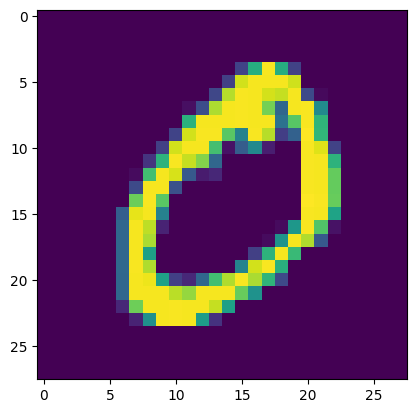

In [2]:
import numpy as np
import matplotlib.pyplot as plt
index =1
# Imprimir las etiquetas y la imagen
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')
#Visualiza la imagen
plt.imshow(training_images[index])

In [4]:
#Normalizar los valores del tren y probar las imágenes
training_images = training_images /255.0
test_images =test_images/255.0


In [19]:
#from sklearn.model_selection import train_test_split
#training_images, training_labels, Val_images, Val_labels = train_test_split(training_images, training_labels, test_size=0.3)

In [5]:
#Construir el modelo de clasificación
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

In [7]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#Entrenar el modelo
history =model.fit(training_images, training_labels, epochs=10)
#validation_data=(X_val, Y_val))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1561 - accuracy: 0.7313
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4800 - accuracy: 0.8739
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3781 - accuracy: 0.8954
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.9047
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3141 - accuracy: 0.9108
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.9145
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2850 - accuracy: 0.9180
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2742 - accuracy: 0.9208
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2642 - accuracy: 0.9233
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.255

<Axes: >

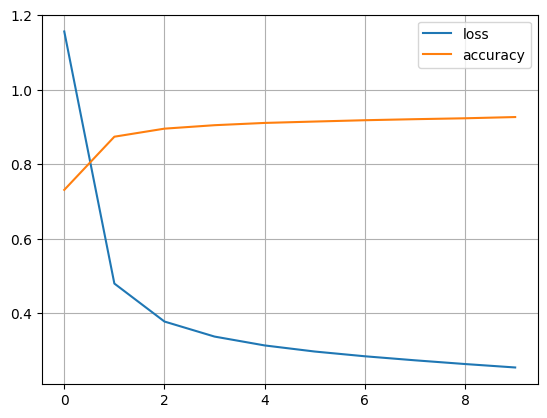

In [9]:
#Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [10]:
#Evaluar el modelo de conjunto de entrenamiento
loss,accuracy = model.evaluate(training_images,training_labels)
print("Perdida en el conjunto de entrenamiento:", loss)
print("Precisión en ele conjunto de entrenamiento:",accuracy)


1875/1875 [==============================] - 2s 1ms/step - loss: 0.2497 - accuracy: 0.9284
Perdida en el conjunto de entrenamiento: 0.24970436096191406
Precisión en ele conjunto de entrenamiento: 0.9284499883651733


In [11]:
#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images,test_labels)
print("Perdidad en el conjunto de prueba:",loss)
print("Perdidad en el conjunto de prueba:",accuracy)


313/313 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.9277
Perdidad en el conjunto de prueba: 0.25009000301361084
Perdidad en el conjunto de prueba: 0.9276999831199646


In [ ]:
#Evaluar el modelo de datos no vistos
loss, accuracy =model.evaluate(test_images, test_labels)
print("Perdida en el conjunto de prueba:",loss)
print("Precisión en el conjunto de prueba:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.9756 - loss: 0.0958
Perdida en el conjunto de prueba: 0.07866596430540085
Precisión en el conjunto de prueba: 0.9793000221252441
